In [7]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('/Users/admin/Desktop/stpred/NSE.csv')

#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


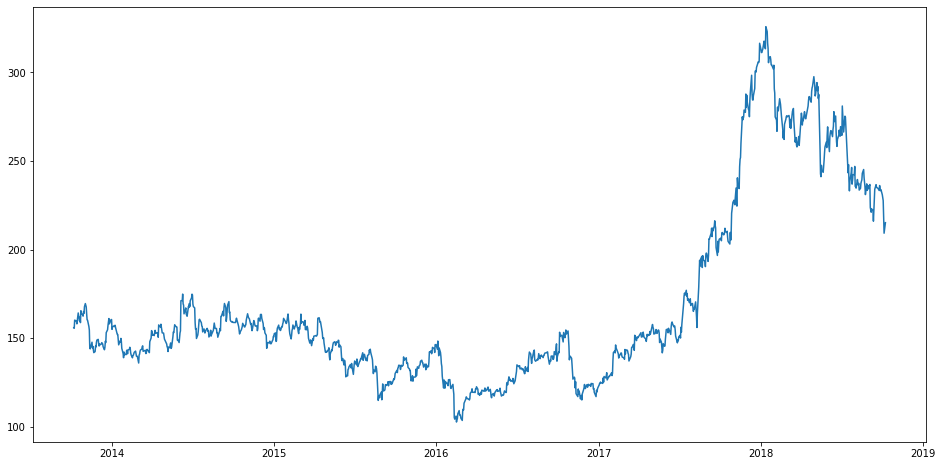

In [8]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [7]:
pip install fastai

  Using cached fastai-1.0.61-py3-none-any.whl (239 kB)
  Using cached pynvx-1.0.0-cp36-cp36m-macosx_10_7_x86_64.whl (117 kB)
  Using cached dataclasses-0.7-py3-none-any.whl (18 kB)
     |████████████████████████████████| 436 kB 822 kB/s eta 0:00:01
Processing /Users/admin/Library/Caches/pip/wheels/f7/a7/14/9be836efed01ac0eb3c125ac006c143b55ebf689269877d0e8/Bottleneck-1.3.2-cp36-cp36m-macosx_10_6_intel.whl
Processing /Users/admin/Library/Caches/pip/wheels/7f/26/a3/33f2079871e2bebb3f53a2b21c3ec64129b8efdd18a6263a52/nvidia_ml_py3-7.352.0-py3-none-any.whl
  Using cached fastprogress-0.2.3-py3-none-any.whl (12 kB)
     |████████████████████████████████| 115 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 80.5 MB 7.8 kB/s eta 0:00:013   |██▌                             | 6.4 MB 3.6 MB/s eta 0:00:21     |███                             | 7.5 MB 3.6 MB/s eta 0:00:21     |████▌                           | 11.2 MB 2.8 MB/s eta 0:00:25     |████▋                           | 11.5 M

Note: you may need to restart the kernel to use updated packages.


In [9]:

df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
new_data.head()    
#from fastai.structured import  add_datepart
#add_datepart(new_data, 'Date')
#new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


In [10]:
#!pip install fastai==0.7.0
from fastai.tabular import *
#from fastai.structured import  add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False
1,155.55,2013,10,41,9,2,282,False,False,False,False,False,False
2,160.15,2013,10,41,10,3,283,False,False,False,False,False,False
3,160.05,2013,10,41,11,4,284,False,False,False,False,False,False
4,159.45,2013,10,42,14,0,287,False,False,False,False,False,False


In [11]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0
new_data.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False,0
1,155.55,2013,10,41,9,2,282,False,False,False,False,False,False,0
2,160.15,2013,10,41,10,3,283,False,False,False,False,False,False,0
3,160.05,2013,10,41,11,4,284,False,False,False,False,False,False,1
4,159.45,2013,10,42,14,0,287,False,False,False,False,False,False,1


In [28]:
import csv
train = new_data[:987]
valid = new_data[987:]
#print(train)
train.to_csv('Train.csv')
new_data.to_csv('Train1.csv')
data_classification = pd.read_csv('/Users/admin/Desktop/stpred/Train1.csv')
#data_classification.head()
#data_classification.shape
#data_classification['Close'].dtype

#train.shape()
#print(valid)

In [44]:
from pycaret.regression import *

reg = setup(data = data_classification, 
             target = 'Close',
             
             categorical_features = ['Is_month_end','Is_month_start','Is_quarter_end','Is_quarter_start','Is_year_end','Is_year_start']  , 
             normalize = False,
             silent = True, train_size = 0.75)



#exp_reg = setup(data_classification, target = 'Close')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6252
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1235, 15)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [22]:
#compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest,2.3996,10.5799,3.2304,0.9686,0.0218,0.0164
1,Extra Trees Regressor,2.5168,11.5708,3.3885,0.9654,0.0228,0.0172
2,CatBoost Regressor,2.5529,11.5984,3.3922,0.9654,0.0229,0.0175
3,Decision Tree,2.5567,13.0482,3.583,0.9611,0.0241,0.0174
4,Light Gradient Boosting Machine,2.9556,16.3141,4.0213,0.9514,0.0275,0.0203
5,Gradient Boosting Regressor,3.391,19.3799,4.3792,0.9417,0.0298,0.0233
6,Extreme Gradient Boosting,3.6734,23.3186,4.8046,0.9299,0.0329,0.0254
7,AdaBoost Regressor,5.6239,48.0893,6.9123,0.8543,0.0492,0.04
8,K Neighbors Regressor,9.2576,149.533,12.1733,0.5526,0.0822,0.0644
9,Bayesian Ridge,9.7404,174.392,13.1391,0.4736,0.0868,0.0664


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,2.8834,14.4394,3.7999,0.9944,0.0218,0.017


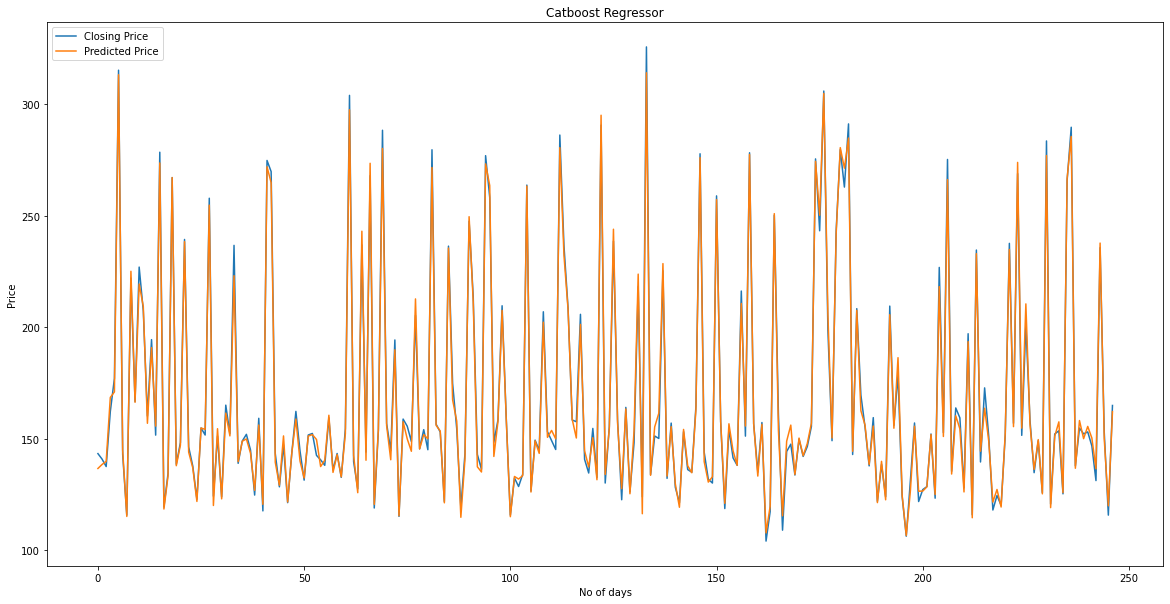

In [60]:
catboost = create_model('catboost')
lr_predictions_holdout = predict_model(catboost)
#print(lr_predictions_holdout)
plt.plot(lr_predictions_holdout['Close'])
plt.plot(lr_predictions_holdout['Label'])
#plt.title('model accuracy')
plt.ylabel('Price')
plt.xlabel('No of days')
plt.title('Catboost Regressor')
plt.legend(['Closing Price', 'Predicted Price'], loc='upper left')
plt.show()
#plt.plot(lr_predictions_holdout[['Close', 'Label']])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2.9428,16.7065,4.0874,0.9935,0.0229,0.0171


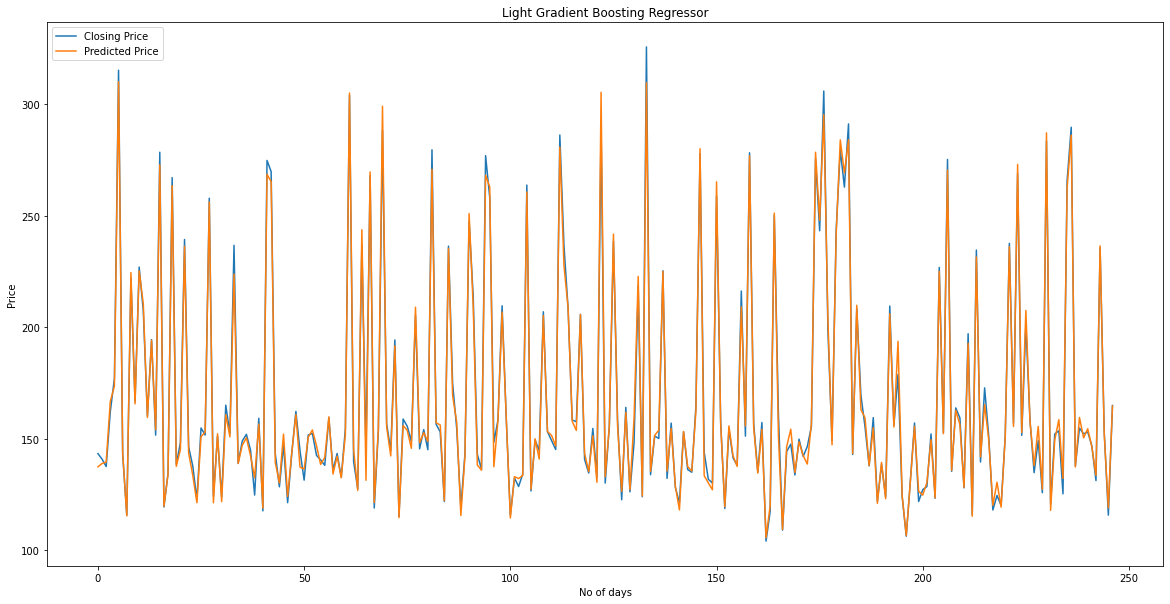

In [61]:
lightgbm = create_model('lightgbm')
lr_predictions_holdout = predict_model(lightgbm)
#print(lr_predictions_holdout)
plt.plot(lr_predictions_holdout['Close'])
plt.plot(lr_predictions_holdout['Label'])
#plt.title('model accuracy')
plt.ylabel('Price')
plt.xlabel('No of days')
plt.title('Light Gradient Boosting Regressor')
plt.legend(['Closing Price', 'Predicted Price'], loc='upper left')
plt.show()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,4.1156,28.4268,5.3317,0.989,0.033,0.0256


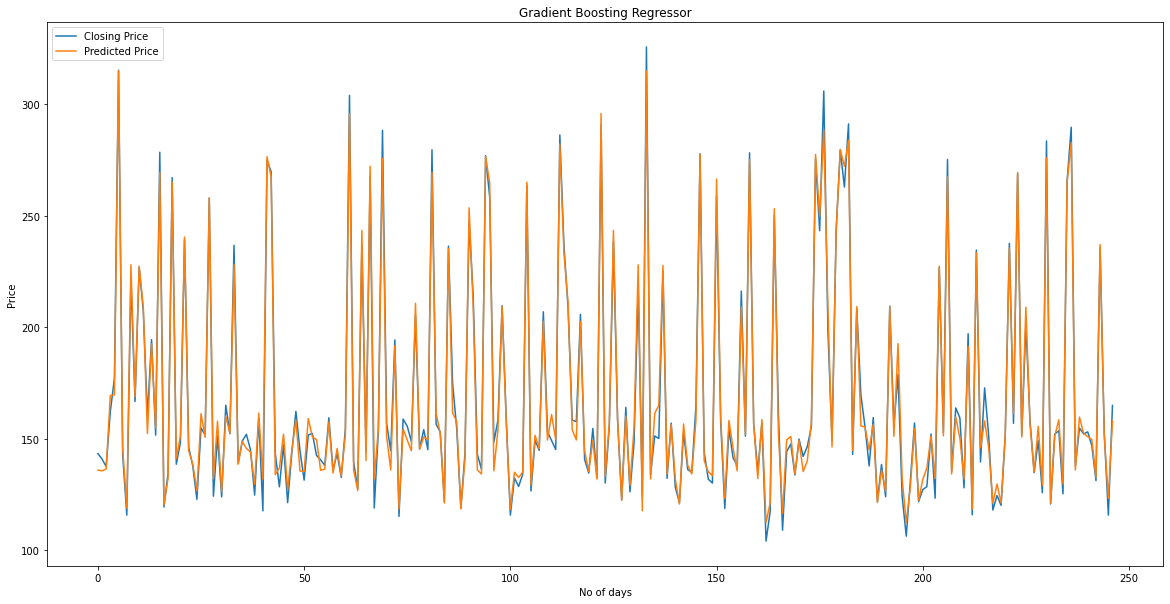

In [62]:
gbr = create_model('gbr')
lr_predictions_holdout = predict_model(gbr)
#print(lr_predictions_holdout)
plt.plot(lr_predictions_holdout['Close'])
plt.plot(lr_predictions_holdout['Label'])
#plt.title('model accuracy')
plt.ylabel('Price')
plt.xlabel('No of days')
plt.title('Gradient Boosting Regressor')
plt.legend(['Closing Price', 'Predicted Price'], loc='upper left')
plt.show()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,4.0942,29.3707,5.4195,0.9886,0.0329,0.0251


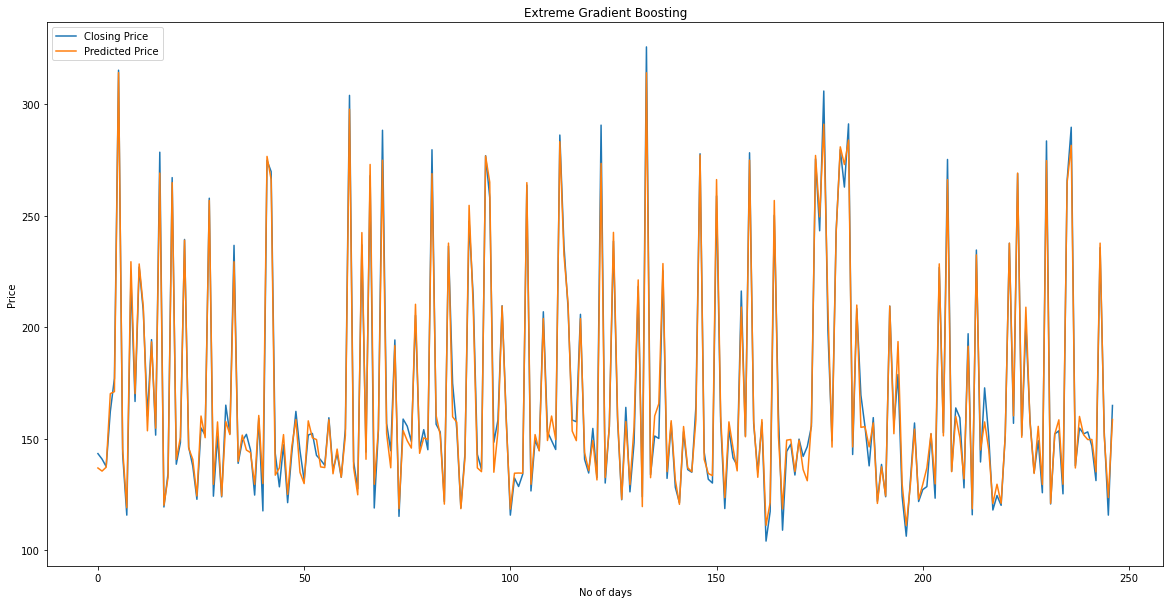

In [63]:
xgboost = create_model('xgboost')
lr_predictions_holdout = predict_model(xgboost)
#print(lr_predictions_holdout)
plt.plot(lr_predictions_holdout['Close'])
plt.plot(lr_predictions_holdout['Label'])
#plt.title('model accuracy')
plt.ylabel('Price')
plt.xlabel('No of days')
plt.title('Extreme Gradient Boosting')
plt.legend(['Closing Price', 'Predicted Price'], loc='upper left')
plt.show()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ada Boost Regressor,10.7181,169.1419,13.0055,0.9345,0.0835,0.0687


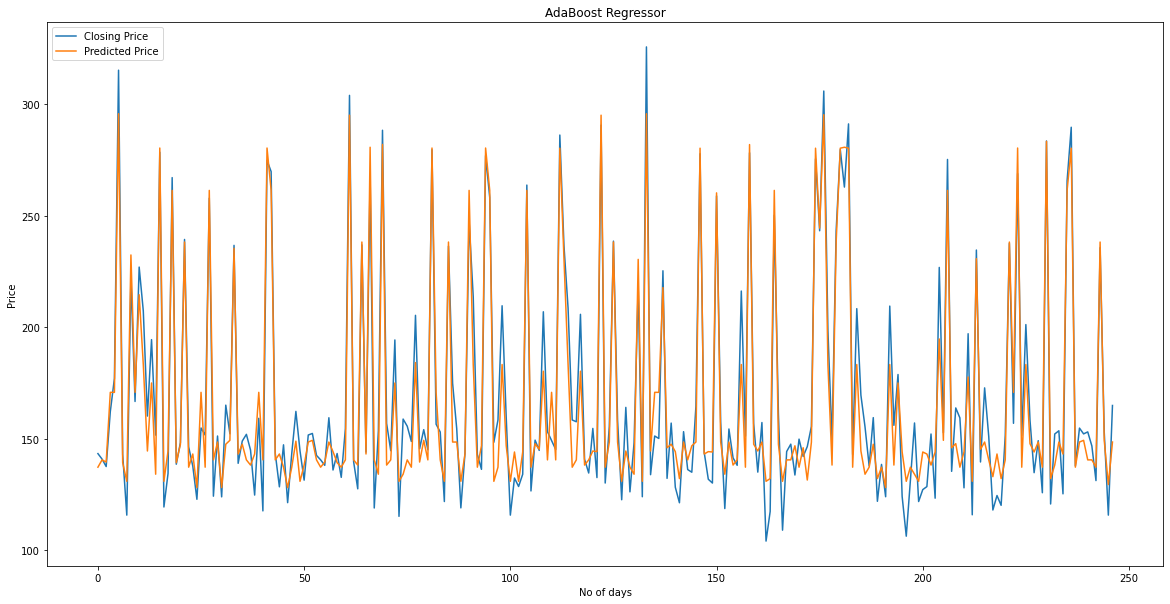

In [64]:
ada = create_model('ada')
lr_predictions_holdout = predict_model(ada)
#print(lr_predictions_holdout)
plt.plot(lr_predictions_holdout['Close'])
plt.plot(lr_predictions_holdout['Label'])
#plt.title('model accuracy')
plt.ylabel('Price')
plt.xlabel('No of days')
plt.title('AdaBoost Regressor')
plt.legend(['Closing Price', 'Predicted Price'], loc='upper left')
plt.show()

In [51]:
lr = create_model('lr')
ridge = create_model('ridge')
svm = create_model('svm')
svm1 = create_model('svm')
stacked_models = stack_models(estimator_list=[lr,ridge,svm, svm1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17.5325,528.6199,22.9917,0.7953,0.1312,0.1078
1,11.3955,209.3636,14.4694,0.9152,0.0913,0.0733
2,18.4750,644.2595,25.3823,0.7825,0.1362,0.1086
3,14.6251,403.6846,20.0919,0.8716,0.1082,0.0837
4,17.3240,540.5360,23.2494,0.8126,0.1349,0.1029
5,19.2266,611.2042,24.7225,0.7186,0.1446,0.1197
6,16.4762,534.4960,23.1192,0.7710,0.1248,0.0975
7,16.6512,549.2962,23.4371,0.7736,0.1213,0.0950
8,15.9920,474.2889,21.7782,0.8243,0.1179,0.0925
9,15.0619,412.3962,20.3075,0.8551,0.1122,0.0883


In [68]:
#catboost = create_model('catboost')
#lightgbm = create_model('lightgbm')
#gbr = create_model('gbr')
#xgboost = create_model('xgboost')
#ada = create_model('ada')
blend_specific = blend_models(estimator_list = [catboost,lightgbm,gbr])
#stacked_models = stack_models(estimator_list=[lightgbm, catboost], meta_model = catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.9780,15.7448,3.9680,0.9939,0.0242,0.0186
1,2.9222,13.0416,3.6113,0.9947,0.0233,0.0187
2,3.2490,19.2094,4.3829,0.9935,0.0242,0.0191
3,3.4608,19.7603,4.4453,0.9937,0.0248,0.0198
4,3.7358,22.8656,4.7818,0.9921,0.0304,0.0234
5,2.8494,14.3606,3.7895,0.9934,0.0232,0.0180
6,3.5967,21.4174,4.6279,0.9908,0.0259,0.0212
7,3.5258,23.3472,4.8319,0.9904,0.0259,0.0205
8,3.6745,28.3436,5.3239,0.9895,0.0301,0.0217
9,3.3368,21.2260,4.6072,0.9925,0.0254,0.0194


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.3280,18.4296,4.2930,0.9929,0.0257,0.0204
1,3.3295,17.1629,4.1428,0.9931,0.0262,0.0208
2,3.5344,22.4339,4.7364,0.9924,0.0251,0.0205
3,3.6998,25.6844,5.0680,0.9918,0.0276,0.0209
4,4.1100,31.2163,5.5872,0.9892,0.0325,0.0250
5,3.3670,20.9195,4.5738,0.9904,0.0267,0.0208
6,3.9106,25.1958,5.0195,0.9892,0.0283,0.0233
7,4.0520,33.3093,5.7714,0.9863,0.0306,0.0233
8,3.6436,26.0834,5.1072,0.9903,0.0291,0.0214
9,3.4395,20.5434,4.5325,0.9928,0.0258,0.0202


In [70]:
rf = create_model('rf')
etr = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.4543,12.1532,3.4861,0.9953,0.0205,0.0147
1,2.3293,9.0329,3.0055,0.9963,0.0185,0.0145
2,2.3417,11.0907,3.3303,0.9963,0.0171,0.0133
3,2.8332,14.3047,3.7822,0.9955,0.0204,0.0158
4,2.3998,11.0589,3.3255,0.9962,0.0199,0.0147
5,2.3056,9.8125,3.1325,0.9955,0.0192,0.0147
6,2.6674,13.5041,3.6748,0.9942,0.0212,0.0162
7,2.8667,14.7486,3.8404,0.9939,0.0211,0.0166
8,2.6669,15.9746,3.9968,0.9941,0.0216,0.0156
9,2.6211,13.6878,3.6997,0.9952,0.0198,0.0148


In [71]:
etr = create_model('et')
stacked_models = stack_models(estimator_list=[catboost, etr], meta_model = rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.8431,16.3054,4.0380,0.9937,0.0236,0.0173
1,2.2828,9.0906,3.0151,0.9963,0.0184,0.0142
2,2.7030,13.6368,3.6928,0.9954,0.0204,0.0158
3,3.1078,18.9354,4.3515,0.9940,0.0236,0.0174
4,2.7030,13.7661,3.7103,0.9952,0.0224,0.0164
5,2.7592,14.1174,3.7573,0.9935,0.0239,0.0177
6,2.8904,15.8246,3.9780,0.9932,0.0235,0.0176
7,3.3304,22.3388,4.7264,0.9908,0.0259,0.0192
8,2.9938,21.1230,4.5960,0.9922,0.0247,0.0177
9,2.8278,15.5408,3.9422,0.9945,0.0216,0.0159
